<a href="https://colab.research.google.com/github/Aicoaching2025/Honey-Production/blob/main/Honey_Production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0    AL   16000.0           71   1136000.0    159000.0        0.72   
1    AZ   55000.0           60   3300000.0   1485000.0        0.64   
2    AR   53000.0           65   3445000.0   1688000.0        0.59   
3    CA  450000.0           83  37350000.0  12326000.0        0.62   
4    CO   27000.0           72   1944000.0   1594000.0        0.70   

    prodvalue  year  
0    818000.0  1998  
1   2112000.0  1998  
2   2033000.0  1998  
3  23157000.0  1998  
4   1361000.0  1998  
   year     totalprod
0  1998  5.105093e+06
1  1999  4.706674e+06
2  2000  5.106000e+06
3  2001  4.221545e+06
4  2002  3.892386e+06


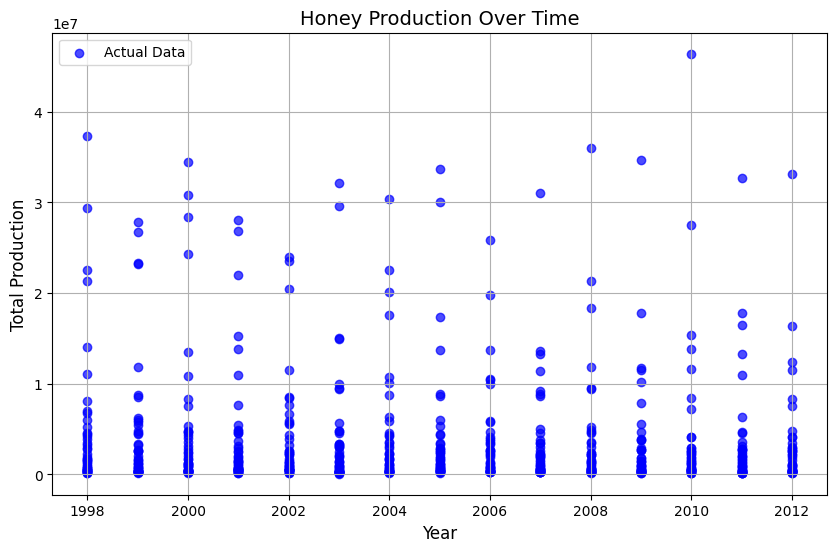

Slope: -88582.6299
Intercept: 181765231.1949


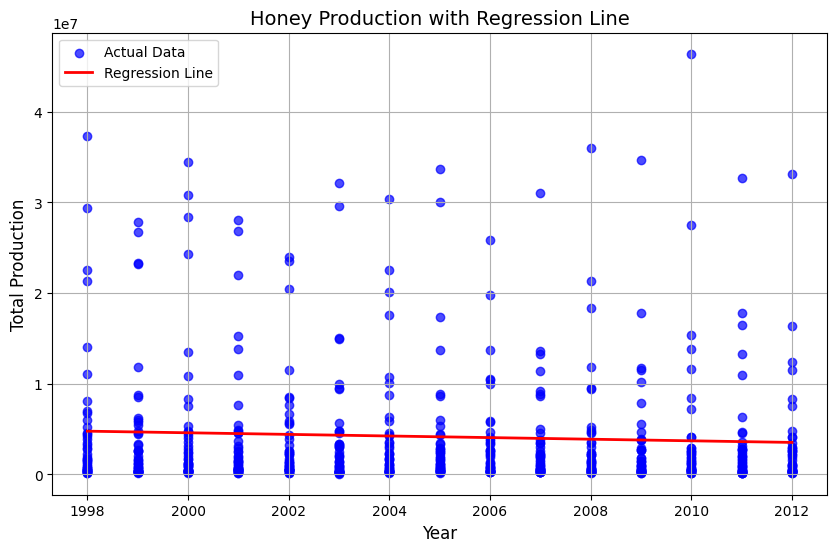

Future Predictions (2013-2050):
2013: 3448397.23
2014: 3359814.60
2015: 3271231.97
2016: 3182649.34
2017: 3094066.71
2018: 3005484.08
2019: 2916901.45
2020: 2828318.82
2021: 2739736.19
2022: 2651153.56
2023: 2562570.93
2024: 2473988.30
2025: 2385405.67
2026: 2296823.04
2027: 2208240.41
2028: 2119657.78
2029: 2031075.15
2030: 1942492.52
2031: 1853909.89
2032: 1765327.26
2033: 1676744.63
2034: 1588162.00
2035: 1499579.37
2036: 1410996.74
2037: 1322414.11
2038: 1233831.48
2039: 1145248.85
2040: 1056666.22
2041: 968083.59
2042: 879500.96
2043: 790918.33
2044: 702335.70
2045: 613753.07
2046: 525170.44
2047: 436587.81
2048: 348005.18
2049: 259422.55


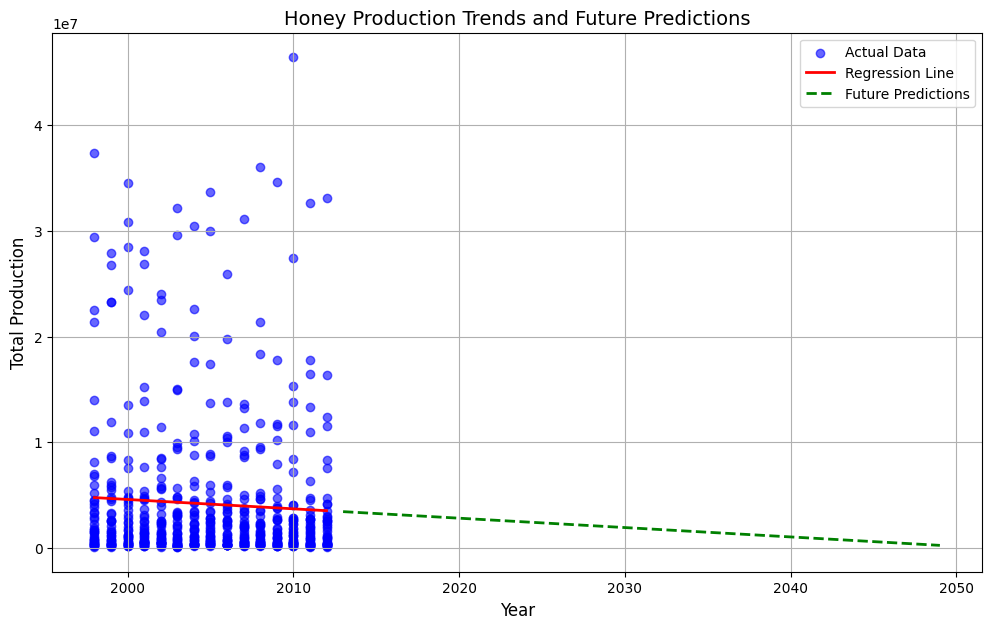

In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Mount Google Drive (Colab)
from google.colab import drive
drive.mount('/content/drive', force_remount=False)  # Avoid remounting if already mounted

# Load the dataset with error handling
file_path = '/content/Honey_Data.csv'
try:
    df = pd.read_csv(file_path)
    print(df.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")

# Check for missing values
if df.isnull().values.any():
    print("Warning: Missing values found. Handling them...")
    df = df.dropna()  # Or df.fillna(value, inplace=True) depending on context

# Group by 'year' and calculate mean total production
mean_prod_per_year = df.groupby('year')['totalprod'].mean().reset_index()
print(mean_prod_per_year.head())

# Prepare features (X) and target (y)
X = df['year'].values.reshape(-1, 1)  # Reshape needed for sklearn
y = df['totalprod'].values

# Visualize the original data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.7)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Production', fontsize=12)
plt.title('Honey Production Over Time', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Print model coefficients
print(f"Slope: {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

# Predict on the original data
y_pred = model.predict(X)

# Plot regression line with scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.7)
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Production', fontsize=12)
plt.title('Honey Production with Regression Line', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

# Future prediction from 2013 to 2050
X_future = np.arange(2013, 2050).reshape(-1, 1)
future_predictions = model.predict(X_future)

# Print a few future predictions
print("Future Predictions (2013-2050):")
for year, prediction in zip(X_future.flatten(), future_predictions):
    print(f"{year}: {prediction:.2f}")

# Plot past data, regression, and future predictions
plt.figure(figsize=(12, 7))
plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.6)
plt.plot(X, y_pred, color='red', label='Regression Line', linewidth=2)
plt.plot(X_future, future_predictions, color='green', linestyle='--', label='Future Predictions', linewidth=2)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Production', fontsize=12)
plt.title('Honey Production Trends and Future Predictions', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()
